In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-price-prediction-dataset/sample_submission.csv
/kaggle/input/used-car-price-prediction-dataset/train.csv
/kaggle/input/used-car-price-prediction-dataset/test.csv


In [2]:
train_df=pd.read_csv('/kaggle/input/used-car-price-prediction-dataset/train.csv')

In [3]:
test_df=pd.read_csv('/kaggle/input/used-car-price-prediction-dataset/test.csv')

In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,54273.0,27136.000000,15667.409917,0.0,13568.0,27136.0,40704.0,54272.0
model_year,54273.0,2015.091979,5.588909,1974.0,2012.0,2016.0,2019.0,2024.0
milage,54273.0,72746.175667,50469.490448,100.0,32268.0,66107.0,102000.0,405000.0
price,54273.0,39218.443333,72826.335535,2000.0,15500.0,28000.0,45000.0,2954083.0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [6]:
train_df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [7]:
train_df.duplicated().sum()

0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


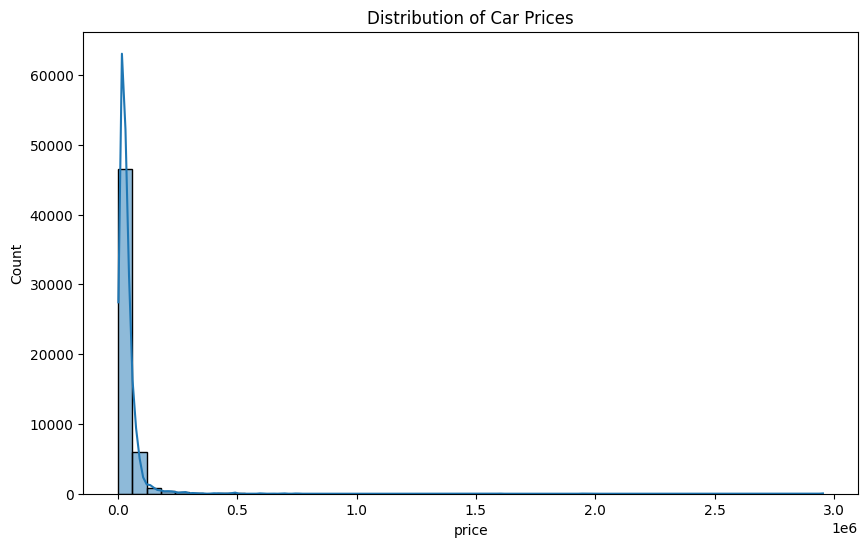

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(train_df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.show()

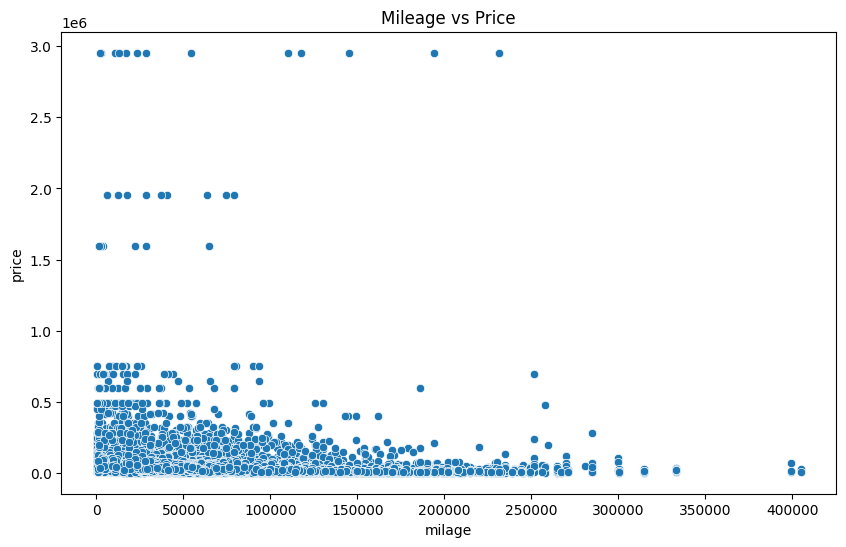

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df['milage'], y=train_df['price'])
plt.title('Mileage vs Price')
plt.show()

In [10]:
categorical_cols = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
for col in categorical_cols:
    train_df[col] = train_df[col].astype('category')


In [11]:
X = train_df.drop(columns=['price', 'id'])
y = train_df['price']

In [12]:
numerical_cols = ['model_year', 'milage']
categorical_cols = X.select_dtypes(include=['category']).columns.tolist()

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [14]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the transformations to the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

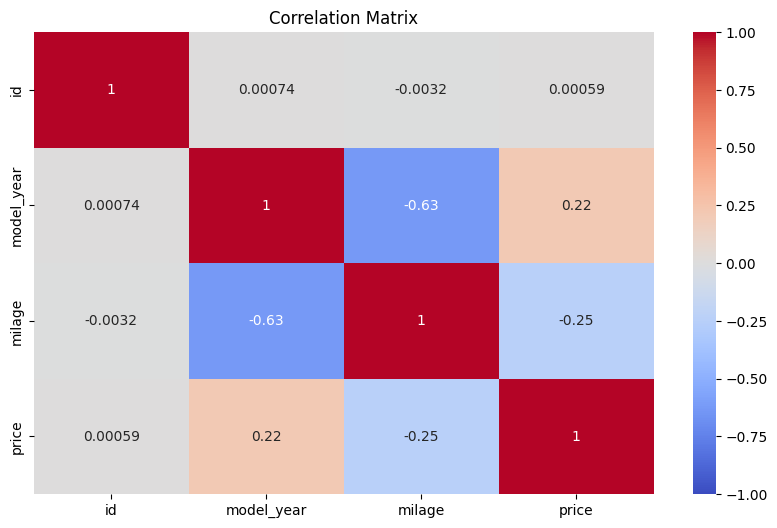

In [17]:
numerical_df = train_df.select_dtypes(include=['int64', 'float64'])

# Correlation Analysis
plt.figure(figsize=(10, 6))
corr = numerical_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression: MAE={mae:.2f}, MSE={mse:.2f}, R2={r2:.2f}")


Linear Regression: MAE=19312.63, MSE=3073998439.86, R2=-0.05


In [20]:
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression: MAE={mae:.2f}, MSE={mse:.2f}, R2={r2:.2f}")


Ridge Regression: MAE=18190.12, MSE=2446905505.22, R2=0.17


In [21]:
# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Lasso Regression: MAE={mae:.2f}, MSE={mse:.2f}, R2={r2:.2f}")


Lasso Regression: MAE=18286.07, MSE=2687842014.52, R2=0.09


In [22]:
# Decision Tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree: MAE={mae:.2f}, MSE={mse:.2f}, R2={r2:.2f}")


Decision Tree: MAE=21545.43, MSE=5097415209.06, R2=-0.73


In [23]:
# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting: MAE={mae:.2f}, MSE={mse:.2f}, R2={r2:.2f}")


Gradient Boosting: MAE=17478.44, MSE=2425559129.60, R2=0.17


In [37]:
from sklearn.neighbors import KNeighborsRegressor

# Define and train the model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest: MAE={mae:.2f}, MSE={mse:.2f}, R2={r2:.2f}")


Random Forest: MAE=18431.19, MSE=2931580651.68, R2=0.00


In [38]:
import xgboost as xgb

# Define and train the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest: MAE={mae:.2f}, MSE={mse:.2f}, R2={r2:.2f}")


Random Forest: MAE=17357.28, MSE=2946531677.81, R2=-0.00


In [39]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2


In [43]:
models = [
    ('Linear Regression', linear_model),
    ('Ridge Regression', ridge_model),
    ('Lasso Regression', lasso_model),
    ('Decision Tree', tree_model),
    ('Gradient Boosting', gb_model),
    ('KNeighborsRegressor',knn_model),
    ('XGBRegressor',xgb_model)
]

In [44]:
results = []
for name, model in models:
    mae, mse, rmse, r2 = evaluate_model(model, X_test, y_test)
    results.append((name, mae, mse, rmse, r2))

# Print results
for name, mae, mse, rmse, r2 in results:
    print(f"{name}: MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R2={r2:.2f}")

Linear Regression: MAE=19312.63, MSE=3073998439.86, RMSE=55443.65, R2=-0.05
Ridge Regression: MAE=18190.12, MSE=2446905505.22, RMSE=49466.21, R2=0.17
Lasso Regression: MAE=18286.07, MSE=2687842014.52, RMSE=51844.40, R2=0.09
Decision Tree: MAE=21545.43, MSE=5097415209.06, RMSE=71396.18, R2=-0.73
Gradient Boosting: MAE=17478.44, MSE=2425559129.60, RMSE=49249.97, R2=0.17
KNeighborsRegressor: MAE=18431.19, MSE=2931580651.68, RMSE=54144.07, R2=0.00
XGBRegressor: MAE=17357.28, MSE=2946531677.81, RMSE=54281.96, R2=-0.00


In [45]:
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])


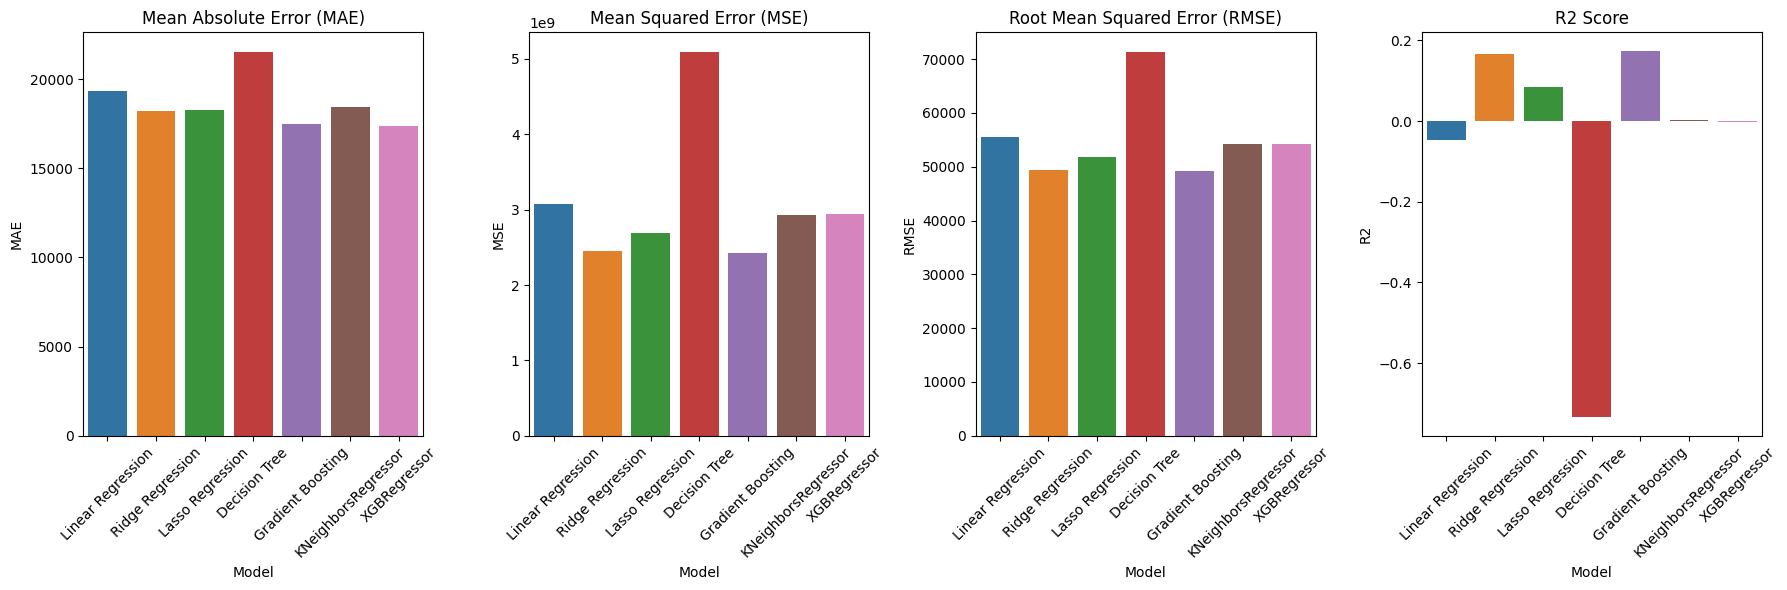

In [46]:
plt.figure(figsize=(18, 6))

# Plot MAE
plt.subplot(1, 4, 1)
sns.barplot(x='Model', y='MAE', data=results_df)
plt.xticks(rotation=45)
plt.title('Mean Absolute Error (MAE)')

# Plot MSE
plt.subplot(1, 4, 2)
sns.barplot(x='Model', y='MSE', data=results_df)
plt.xticks(rotation=45)
plt.title('Mean Squared Error (MSE)')

# Plot RMSE
plt.subplot(1, 4, 3)
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.xticks(rotation=45)
plt.title('Root Mean Squared Error (RMSE)')

# Plot R2 Score
plt.subplot(1, 4, 4)
sns.barplot(x='Model', y='R2', data=results_df)
plt.xticks(rotation=45)
plt.title('R2 Score')

plt.tight_layout()
plt.show()

In [47]:
import pickle

In [48]:
with open('model.pkl','wb') as file:
    pickle.dump(gb_model,file)